In [1]:
# 基本モジュール
import pandas as pd
import numpy as np

# 可視化モジュール
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 分析モジュール
from sklearn import linear_model

In [3]:
df = pd.read_csv('step_2_1_3.csv')

In [5]:
# data.info()でデータ型やnull（欠損値）ではないデータの個数が分かります
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
price       500 non-null object
tsubo       500 non-null object
tsubo_su    500 non-null float64
kenpei      500 non-null float64
building    500 non-null object
age         500 non-null int64
birth       500 non-null int64
area        500 non-null object
dtypes: float64(2), int64(2), object(4)
memory usage: 31.3+ KB


In [6]:
# 4桁ごとのカンマ(,)を桁区切りとして無視してデータを読み込む
df = pd.read_csv('step_2_1_3.csv',thousands=',')

In [8]:
round(df.describe(),0)

,price,tsubo,tsubo_su,kenpei,building,age,birth
count,500.0,500.0,500.0,500.0,500.0,500.0,500.0
mean,49698200.0,647582.0,40.0,1.0,450258.0,40.0,1976.0
std,8426389.0,80350.0,5.0,0.0,39636.0,4.0,4.0
min,23700000.0,397000.0,28.0,1.0,336000.0,29.0,1964.0
25%,44100000.0,592750.0,37.0,1.0,424000.0,37.0,1973.0
50%,49350000.0,648000.0,40.0,1.0,451000.0,40.0,1976.0
75%,55525000.0,704250.0,44.0,1.0,478000.0,43.0,1979.0
max,71000000.0,889000.0,61.0,1.0,542000.0,52.0,1987.0


In [9]:
# 指数表示にならないようにpandasの表示オプションを変更します。 
pd.options.display.float_format = '{:.2f}'.format

# areaの値ごとに平均値を計算する
df.groupby(['area']).mean()

,price,tsubo,tsubo_su,kenpei,building,age,birth
area,,,,,,,
A,54775627.24,667784.95,41.79,0.85,451620.07,40.16,1975.84
B,43452380.95,628297.62,38.37,0.85,442964.29,40.05,1975.95
C,43229166.67,620666.67,38.50,0.85,453552.08,40.61,1975.39
D,43090243.90,612634.15,39.76,0.85,448219.51,39.27,1976.73


In [10]:
df.groupby(['area']).mean()[['price']]

,price
area,
A,54775627.24
B,43452380.95
C,43229166.67
D,43090243.90


In [11]:
corr_mat = df.corr(method='pearson')
corr_mat

,price,tsubo,tsubo_su,kenpei,building,age,birth
price,1.00,0.45,0.36,0.07,0.06,0.10,-0.10
tsubo,0.45,1.00,-0.04,0.06,-0.01,0.07,-0.07
tsubo_su,0.36,-0.04,1.00,-0.02,-0.05,-0.02,0.02
kenpei,0.07,0.06,-0.02,1.00,-0.04,0.02,-0.02
building,0.06,-0.01,-0.05,-0.04,1.00,0.07,-0.07
age,0.10,0.07,-0.02,0.02,0.07,1.00,-1.00
birth,-0.10,-0.07,0.02,-0.02,-0.07,-1.00,1.00


In [12]:
corr_mat[['price']]

,price
price,1.00
tsubo,0.45
tsubo_su,0.36
kenpei,0.07
building,0.06
age,0.10
birth,-0.10


In [13]:
# from sklearn import linear_model

In [14]:
# 説明変数を定義する
X = df[['tsubo','tsubo_su']]

# 目的変数を定義する
Y = df[['price']]

In [15]:
X.head(2)

,tsubo,tsubo_su
0,563000,44.69
1,694000,41.74


In [16]:
Y.head(2)

,price
0,47400000
1,60300000


In [17]:
reg = linear_model.LinearRegression()

In [18]:
reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
print('回帰係数は',reg.coef_,'\n')
print('切片は',reg.intercept_)

回帰係数は [[4.91259738e+01 6.26276201e+05]] 

切片は [-7427890.70904541]


In [20]:
print('作成されたモデル：priceの予測値 = {0:.1f}×tsuboの値 + {1:.1f}×tsubo_suの値 + {2:.1f}'
      .format(reg.coef_[0][0],reg.coef_[0][1],reg.intercept_[0]))

作成されたモデル：priceの予測値 = 49.1×tsuboの値 + 626276.2×tsubo_suの値 + -7427890.7


In [21]:
df.head(3)[['price','tsubo','tsubo_su']]

,price,tsubo,tsubo_su
0,47400000,563000,44.69
1,60300000,694000,41.74
2,53700000,744000,42.89


In [22]:
reg.predict([[563000, 44.69],
             [694000, 41.73]])

array([[48218315.98351054],
       [52800040.99664127]])

In [23]:
# モデル作成に使った説明変数に対する予測値を出力する(最初の3行のみ)
reg.predict(X)[:3]

array([[48218315.98351054],
       [52806303.75865462],
       [55982820.08067866]])

In [24]:
Y_pred = reg.predict(X) #予測値を出力する
Y_pred[:3] #最初の3つの要素を確認する

array([[48218315.98351054],
       [52806303.75865462],
       [55982820.08067866]])

Text(0,0.5,'predicted data')

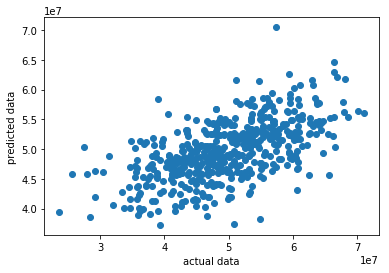

In [25]:
# 散布図をプロットする
plt.scatter(Y,Y_pred)
plt.xlabel('actual data')
plt.ylabel('predicted data')

In [26]:
# 決定係数を出力
reg.score(X,Y)

0.3520178148928559

In [27]:
df.head(2)

,price,tsubo,tsubo_su,kenpei,building,age,birth,area
0,47400000,563000,44.69,0.83,482000,30,1986,A
1,60300000,694000,41.74,0.76,518000,36,1980,A


In [28]:
# Step1：データから目的変数と説明変数(複数列でも可)を選ぶ
Y2 = df[['price']] # 目的変数を定義する
X2 = df.drop(['area','price'],axis=1) # 説明変数を定義する

# Step2：使いたい予測モデルを選んで、必要なモジュールをインポートする(今回は回帰モデルを選ぶ)
# 今回はすでにインポート済みなのでインポートは不要です

# Step3：モデルのクラスからモデルインスタンスを生成する
reg2 = linear_model.LinearRegression()

# Step4：生成したインスタンスに目的変数と説明変数を指定する(`fit`させる)
reg2.fit(X2,Y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
print('回帰係数は',reg2.coef_,'\n') #アンダーバー(_)に注意、忘れないように！
print('切片は',reg2.intercept_)

回帰係数は [[ 4.84069383e+01  6.36821574e+05  8.46878033e+06  1.66749103e+01
   7.38658785e+04 -7.38658785e+04]] 

切片は [1.20864454e+08]


Text(0,0.5,'predicted data')

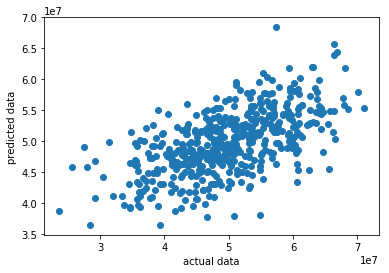

In [30]:
#　実測値と予測値の散布図をプロットする
plt.scatter(Y2,reg2.predict(X2))

# 散布図をプロットする
plt.xlabel('actual data')
plt.ylabel('predicted data')

In [31]:
# 決定係数を出力
reg2.score(X2,Y2)

0.3661563793193878

In [32]:
print('tsuboとtsubo_suを使った回帰モデルの決定係数：{0:.3f}'.format(reg.score(X,Y)))
print('area以外の説明変数を使った回帰モデルの決定係数：{0:.3f}'.format(reg2.score(X2,Y2)))

tsuboとtsubo_suを使った回帰モデルの決定係数：0.352
area以外の説明変数を使った回帰モデルの決定係数：0.366


In [33]:
# 自由度調整済み決定係数を出力する関数を定義します
# n：データ数
# k：説明変数の数
# r2：決定係数

def adjr2(n,k,r2):
    return 1 - ((n-1)/(n-k-1))*(1-r2)

In [34]:
#データ数
n = df.shape[0]
n

500

In [35]:
# 列数
k = len(X.columns)
k

2

In [36]:
# 決定係数
r2 = reg.score(X,Y)
r2

0.3520178148928559

In [37]:
# 自由度調整済み決定係数を出力する
adjr2(n,k,r2)

0.3494102407073141

In [38]:
print('n = {0:.0f}, k = {1:.0f}, r2 = {2:.3f}'.format(df.shape[0],len(X2.columns),reg2.score(X2,Y2)))

n = 500, k = 6, r2 = 0.366


In [39]:
# 自由度調整済み決定係数を出力する
n2 = df.shape[0]
k2 = len(X2.columns)
r22 = reg2.score(X2,Y2)

adjr2(n2,k2,r22)

0.3584422581752019

In [40]:
df.groupby(['area']).mean()[['price']]

,price
area,
A,54775627.24
B,43452380.95
C,43229166.67
D,43090243.90


In [41]:
df.head(3)

,price,tsubo,tsubo_su,kenpei,building,age,birth,area
0,47400000,563000,44.69,0.83,482000,30,1986,A
1,60300000,694000,41.74,0.76,518000,36,1980,A
2,53700000,744000,42.89,0.95,384000,38,1978,A


In [42]:
X3 = df.drop(['price'], axis=1)

In [43]:
X3 = pd.get_dummies(df)
X3.head(2)

,price,tsubo,tsubo_su,kenpei,building,age,birth,area_A,area_B,area_C,area_D
0,47400000,563000,44.69,0.83,482000,30,1986,1,0,0,0
1,60300000,694000,41.74,0.76,518000,36,1980,1,0,0,0


In [44]:
X3 = X3.drop(['price','area_D'], axis=1)
X3.head(2)

,tsubo,tsubo_su,kenpei,building,age,birth,area_A,area_B,area_C
0,563000,44.69,0.83,482000,30,1986,1,0,0
1,694000,41.74,0.76,518000,36,1980,1,0,0


それではモデリングを開始します。

In [45]:
# Step1：データから目的変数と説明変数(複数列でも可)を選ぶ
Y3 = df[['price']] # 目的変数を定義する
# X3 # 説明変数を定義する

# Step2：使いたい予測モデルを選んで、必要なモジュールをインポートする(今回は回帰モデルを選ぶ)
# 今回はすでにインポート済みなのでインポートは不要です

# Step3：モデルのクラスからモデルインスタンスを生成する
reg3 = linear_model.LinearRegression()

# Step4：生成したインスタンスに目的変数と説明変数を指定する(`fit`させる)
reg3.fit(X3,Y3)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [46]:
print('回帰係数は',reg3.coef_,'\n') #アンダーバー(_)に注意、忘れないように！
print('切片は',reg3.intercept_)

回帰係数は [[ 3.22068032e+01  3.70931481e+05  6.78544632e+06  1.01078313e+01
   8.27616482e+04 -8.27616482e+04  8.93602422e+06  2.86765217e+05
   4.33661459e+04]] 

切片は [1.58670879e+08]


Text(0,0.5,'predicted data')

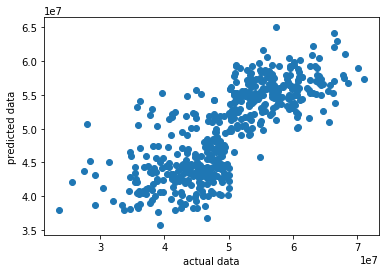

In [47]:
#　実測値と予測値の散布図をプロットする
plt.scatter(Y3,reg3.predict(X3))

# 散布図をプロットする
plt.xlabel('actual data')
plt.ylabel('predicted data')

In [48]:
# 決定係数を出力
reg3.score(X3,Y3)

0.5874873770510494

In [49]:
print('n = {0:.0f}, k = {1:.0f}, r2 = {2:.3f}'.format(df.shape[0],len(X3.columns),reg3.score(X3,Y3)))

n = 500, k = 9, r2 = 0.587


In [50]:
# 自由度調整済み決定係数を出力する
n3 = df.shape[0]
k3 = len(X3.columns)
r23 = reg3.score(X3,Y3)

adjr2(n3,3,r23)

0.5849923410251484

In [51]:
# df2 = pd.read_csv('house.csv')
# df2.head(3)

In [52]:
# ここに回答を記載してください。

In [53]:
# モデルの書き出し
import pickle

file = 'trained_model.pkl'
pickle.dump(reg3, open(file, 'wb'))